# Análise do Titanic

Quero que você faça uma análise da tragédia do Titanic, verifique quais são as características mais importantes para a morte de um indivíduo nessa tragédia. Para isso, você vai utilizar os dados que estão no arquivo **titanic.csv** na pasta **dados**. Esses dados foram retirados da plataforma Kaggle, para maiores informações sobre as colunas e seus valores acessar [aqui](https://www.kaggle.com/c/titanic/data).

### Importando os pacotes para análise

In [2]:
# para manipulação dos dados
import pandas as pd
# para visualização
from plotnine import *
import matplotlib.pyplot as plt

# para que os gráficos sejam
# mostrados
%matplotlib inline

### Carregando o conjunto de dados

Carregue o conjunto de dados, que se encontra em *"../dados/titanic.csv"*, com auxílio do método ```pd.read_csv```

In [3]:
# Para mais informações sobre
# o funcionamento do método
# execute o seguinte comando:
# ?pd.read_csv

# Faça o carregamento aqui.
# df = pd.read_csv(...)

### Tendo uma visão geral do conjunto de dados

Imprima as 10 primeira linhas do dataframe com o método ```df.head``` e, em seguita, imprima as estatísticas gerais do conjunto de dados com o método ```df.describe```.

In [14]:
# use o head aqui...

In [21]:
# use o método describe aqui...
# lembre-se de utilizar o argumento
# `include="all"`, para obter as
# estatísticas das colunas categóricas e numéricas.

### Primeiro gráfico

No gráfico a seguir, queríamos construir um boxplot para cada classe, porém a coluna Pclass é foi inferida como numérica.

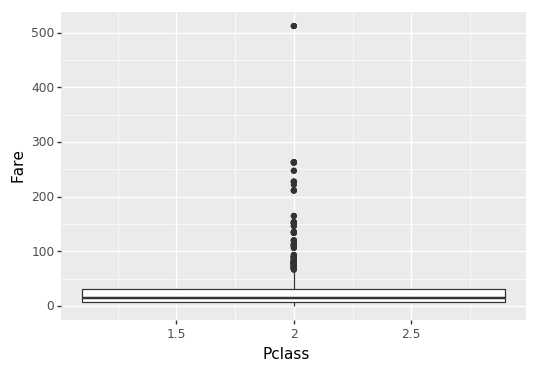

<ggplot: (8737760772221)>

In [6]:
ggplot(df, aes(x = "Pclass", y = "Fare")) + \
geom_boxplot()

O plotnine nos provê uma forma muito simples de contornar esse problema, utilizando a expressão **factor** juntamente com nome da coluna que queremos que seja tratada como categórica. Veja o exemplo abaixo.

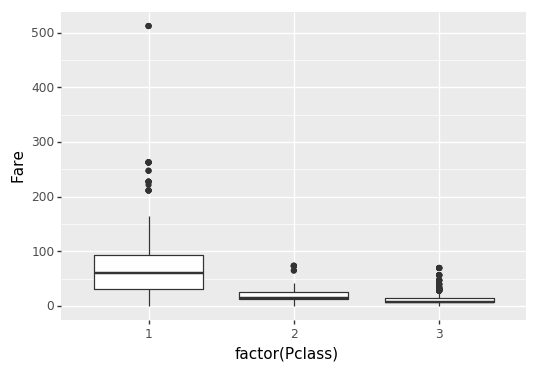

<ggplot: (8737760793629)>

In [7]:
ggplot(df, aes(x = "factor(Pclass)", y = "Fare")) + \
geom_boxplot()

Além dessa alternativa, nós podemos de fato transformar as colunas em categóricas como vai ser mostrado a seguir.

### Transformando colunas Survived e Pclass em categóricas

Note que os tipos das colunas Survived e Pclass foram armazenadas com valores numéricos e , portanto, o pandas inferiu que elas fossem numéricas no dataframe. Porém, elas tem mais uma conotação de categoria, pois estamos classificando algo com elas. Portanto, vamos tratá-las como colunas categóricas. Para isso, precisamos apenas converter para o tipo do pandas chamado "category".

In [8]:
# Estou transformando os rótulos `zero` e `um` em algo mais legível com a função apply
# e, então, convertendo a series para o tipo categórico com a função astype
df['cat_Survived'] = df.Survived.apply(lambda x: ["morreu", "sobreviveu"][x]).astype("category")

# veja o resultado a seguir
df['cat_Survived'].head()

0        morreu
1    sobreviveu
2    sobreviveu
3    sobreviveu
4        morreu
Name: cat_Survived, dtype: category
Categories (2, object): [morreu, sobreviveu]

In [9]:
# Faça o mesmo com a coluna Pclass
# df['cat_Pclass'] = ...
df['cat_Pclass'] = df.Pclass.astype("category")

### Execute o df.describe novamente

In [33]:
# use o método describe aqui...
# lembre-se de utilizar o argumento
# `include="all"`, para obter as
# estatísticas das colunas categóricas e numéricas.

### Visualizando  como valor dos tickets influenciam na sobrevivência

/home/raphael/Documents/puc/.venv/local/lib/python2.7/site-packages/plotnine/geoms/geom_crossbar.py:84: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."


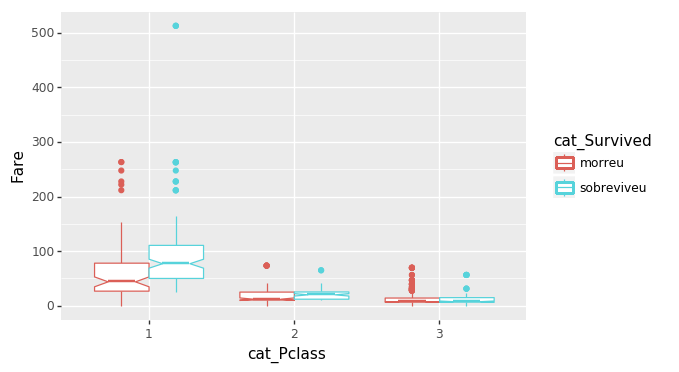

<ggplot: (8737702694177)>

In [22]:
ggplot(df, aes(x = "cat_Pclass", y = "Fare", color="cat_Survived")) + \
geom_boxplot(notch=True)

É possível notar que para primeira classe há uma diferença entre a mediana dos grupos, ou seja, o preço do tickets tem uma certa influência na chance de sobreviência. Todavia, não é o único fator. Para as demais classes é difícil de ver essa diferença devido a escala do valor dos tickets em cada grupo. Em outras palavras, o preço do tickets da primeira classe é muito maior que o preço dos tickets da segunda e terceira.

Uma forma de contornar esse problema seria deixar os valores em uma mesma escala. Para isso, nós poderíamos dividir os valores em cada grupo por seus respectivos valores máximos.

Para isso, iremos utilizar o método ```groupby``` em conjunto com o ```apply```. O exemplo a seguir mostra como:

In [25]:
# agrupamos os valores dos tickets por classe e, então,
# cada um desses valores é divido pelo valor máximo da classe
df['scaledFare'] = df.groupby('cat_Pclass').Fare.apply(lambda class_fares: class_fares / class_fares.max())

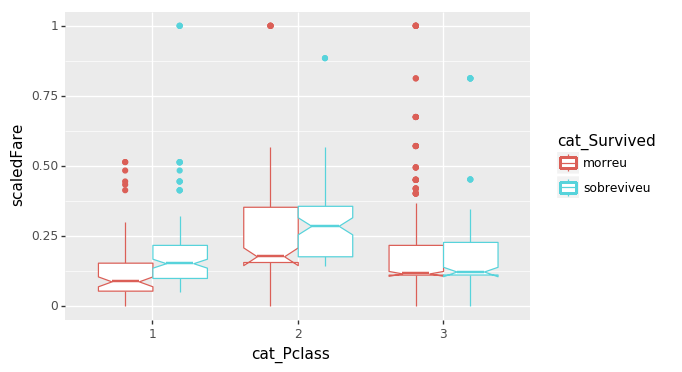

<ggplot: (8737759562569)>

In [29]:
ggplot(df, aes(x = "cat_Pclass", y = "scaledFare", color="cat_Survived")) + \
geom_boxplot(notch=True)

### Visualizando  como idade e gênero afetam a sobrevivência

Trace um boxplot para tentar visualizar como idade e gênero afetam a sobrevivência.

/home/raphael/Documents/puc/.venv/local/lib/python2.7/site-packages/plotnine/layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


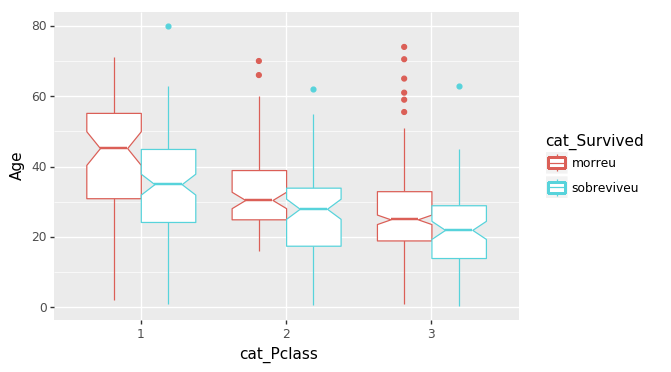

<ggplot: (8737760787961)>

In [34]:
grafico = ggplot(df, aes(x = "cat_Pclass", y = "Age", color="cat_Survived"))
grafico += geom_boxplot(notch=True)
grafico

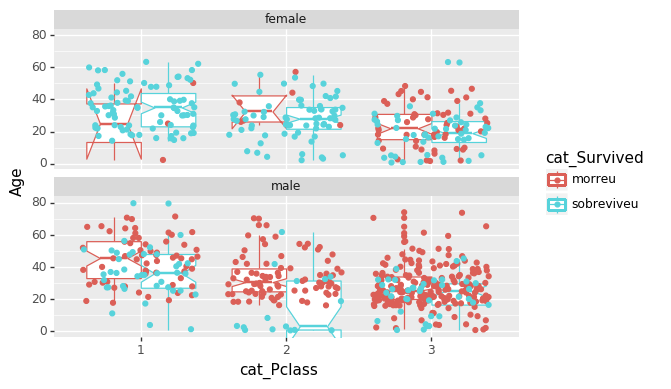

<ggplot: (8737760787961)>

In [37]:
# Além do ggplot e boxplot, utilize facet_wrap para dividir o gráfico por gênero.
grafico += # complete com facet_wrap
grafico

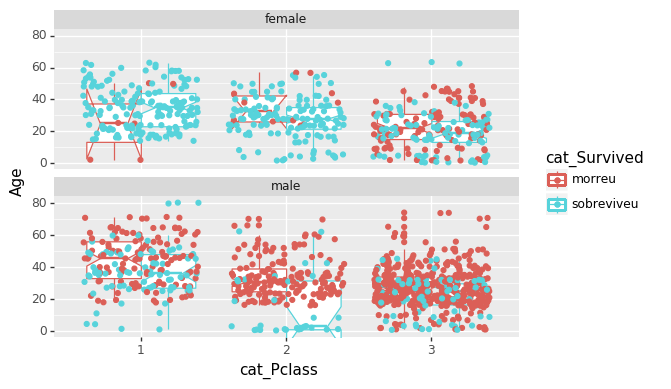

<ggplot: (8737760787961)>

In [38]:
# For fim, adicione o geom_jitter. Ele é um bom complemento ao box_plot,
# pois conseguimos ter uma noção de quantidade de pontos no box_plot
grafico += # complete com geom_jitter
grafico

### Discretizando a Idade